<a href="https://colab.research.google.com/github/roscibely/Sistemas-de-controle-Lab/blob/main/Espa%C3%A7o_de_estado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Controle no Espaço de Estados

- Aprimoramento dos conceitos envolvidos na teoria de espaço de estados;
- Introdução ao projeto de controladores no espaço de estados;


## 1.1 Introdução 

O controle no Espaço de Estados é aplicável a sistemas de múltiplas entradas e múltiplas saídas, que podem ser lineares ou não-lineares, invariantes ou variantes no tempo e com condições iniciais nulas ou não. 

Considera-se que o estado de um sistema no instante $t_0$ é a quantidade de informação em $t_0$, que, junto
com a entrada $u(t)$ em , determina univocamente o comportamento do sistema para todo .

Assim, a representação de um sistema dinâmico no espaço de estados pode ser descrita pelas seguintes equações:

\begin{array}{c}
\dot{x}(t) = f(x(t),u(t),t)\\
y(t) = g(x(t),u(t),t)\\
\end{array}



In [ ]:
!pip install control #Necessário para fazer o download da biblioteca control

In [47]:
#Bibliotecas necessárias
import numpy as np
import control as control
import matplotlib.pyplot as plt
from control.matlab import *
import sympy as sy

## 1.2 Definindo o sistema 

Uma possível representação do modelo no Espaço de Estados (EE) dos tanques acoplado pode ser dada por, 

\begin{array}{c}
\dot{x}(t) = Ax(t)+ Bu(t)\\
\end{array}
com 

$A=\left[ \begin{array}{cc}
-\frac{a_1}{A_1}\sqrt{\frac{g}{2L_{10}}} & 0\\
\frac{a_1}{A_2}\sqrt{\frac{g}{2L_{10}}} & -\frac{a_2}{A_2}\sqrt{\frac{g}{2L_{20}}}
\end{array} \right]$

$B=\left[ \begin{array}{c}
\frac{k_m}{A_1} \\ 0
\end{array} \right] $

In [170]:
#Definindo o modelo do sistema 

a1 = 0.17813919765      # Diâmetro do orifício do tanque (cm²) 
a2 = a1
A1 = 15.5179            # Área da base do tanque (cm²) 
A2 = A1
g = 9.807               # Aceleração gravitacional (m/s²) 
km = 3*4.6                # Constante de fluxo da bomba cm³/s.V 
L20 = 15                # Constante da ODEs 
L10 = ( (a2**2)/(a1**2) ) * L20

#####################  Espaço de estado #######################################
A11 = -1*(a1/A1)*np.sqrt(g/(2*L10))
A12 = 0
A21 = (a1/A2)*np.sqrt(g/(2*L10))
A22 = -1*(a2/A2)*np.sqrt(g/(2*L20))
B1 = (km/A1)
B2 = 0.0
A=sy.Matrix([[A11, A12],
             [A21, A22]])
B=np.matrix([[B1],
            [B2]]) 
C=np.array([[0, 1]])
D=0
print('A=',A, '\nB=',B)

A= Matrix([[-0.00656347753805401, 0], [0.00656347753805401, -0.00656347753805401]]) 
B= [[0.88929559]
 [0.        ]]


## 1.3 Matriz de controlabilidade

In [106]:
Cm=ctrb(A,B)
print(Cm)

[[ 0.88929559 -0.00583687]
 [ 0.          0.00583687]]


## 1.4 Polinômio característico 

In [104]:
lamda = sy.symbols('lamda')
poli = A.charpoly(lamda) 
poli= sy.factor(p.as_expr()) #Polinômio característico
print('Polinômio característico:')
sy.factor(p.as_expr())

Polinômio característico:


1.0*(1.0*lamda**2 + 0.013126955076108*lamda + 4.30792373925396e-5)

In [105]:
sol =sy.solve(poli)
print('Solução do polinômio: ', sol)

Solução do polinômio:  [-0.006563477538054 - 4.50535118591215e-10*I, -0.006563477538054 + 4.50535118591215e-10*I]


## 1.5 Calculo do controlador utilizando o método de  Ackermann

In [154]:
K = acker(A, B, [-1.050535118591215,-0.06563477538054])
print(K)

[[ 1.2403558  10.56537882]]


## 1.6 Simulação 

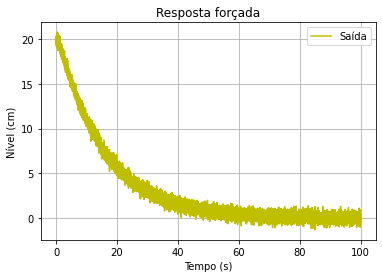

In [191]:
clsys = ss(A - B*K, B, C, D) # Sistema em malha fechada 
tf = 100.00                  # Tempo de simulação em segundos 
dt = 0.01                    # Tempo de amostragem
t = np.arange(0, tf, dt)
r = np.zeros(t.shape)
ruido=np.random.normal(0, 0.4, len(t))
T, Y, X = control.forced_response(clsys, t, r, X0=[1, 20])
plt.figure()
plt.plot(T,Y+ruido, 'y')
plt.legend(["Saída"])
plt.title('Resposta forçada')
plt.ylabel('Nível (cm)')
plt.xlabel('Tempo (s)')
plt.grid('True')

Para mais funções veja: https://python-control.readthedocs.io/en/0.8.3/control.html
